# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set empty list to store data
city2 = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
date = []

In [4]:
# Set vatiable to process data 
record = 0
set_key = 1

In [5]:
# Create search query 

url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [6]:
# Try to grab the data of cities if they are available 
print('Beginning Data Retrieval')
print('-----------------------------')

# For loop all the cities
for city in cities:
# Put the data in the empty lists     
    try:
        response = requests.get(query_url + city).json() 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        city2.append(city)

# Print log of each city
        if record > 48:
            record = 1
            set_key += 1
            
        else: 
            record += 1
            
        print(f'Processing Record {record} of Set {set_key} | {city}')
    except:
        print('City not found. Skipping...')
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | airai
City not found. Skipping...
Processing Record 3 of Set 1 | sawtell
Processing Record 4 of Set 1 | ishigaki
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | diplo
Processing Record 8 of Set 1 | samarai
City not found. Skipping...
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | port blair
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | billings
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | maracacume
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | baykit
City not found. Skipping...
Processing Record 21 of Set 1 | tuatapere
City not foun

Processing Record 42 of Set 4 | tisovec
Processing Record 43 of Set 4 | launceston
Processing Record 44 of Set 4 | matagami
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | rioja
City not found. Skipping...
Processing Record 48 of Set 4 | iqaluit
City not found. Skipping...
Processing Record 49 of Set 4 | singaraja
Processing Record 1 of Set 5 | wuda
Processing Record 2 of Set 5 | eureka
City not found. Skipping...
Processing Record 3 of Set 5 | dhule
Processing Record 4 of Set 5 | jiuquan
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | ranot
City not found. Skipping...
Processing Record 7 of Set 5 | danielskuil
Processing Record 8 of Set 5 | vostok
Processing Record 9 of Set 5 | lata
Processing Record 10 of Set 5 | gazanjyk
Processing Record 11 of Set 5 | voi
City not found. Skipping...
Processing Record 12 of Set 5 | provideniya
Processing Record 13 of Set 5 | dennery
Processing Record 14 of

Processing Record 35 of Set 8 | baghdad
Processing Record 36 of Set 8 | trairi
Processing Record 37 of Set 8 | norman wells
City not found. Skipping...
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | nokaneng
Processing Record 40 of Set 8 | stornoway
Processing Record 41 of Set 8 | phonhong
Processing Record 42 of Set 8 | mao
Processing Record 43 of Set 8 | hobbs
Processing Record 44 of Set 8 | mayo
Processing Record 45 of Set 8 | paamiut
Processing Record 46 of Set 8 | tessalit
Processing Record 47 of Set 8 | goderich
Processing Record 48 of Set 8 | mantua
City not found. Skipping...
Processing Record 49 of Set 8 | ambilobe
Processing Record 1 of Set 9 | ocampo
Processing Record 2 of Set 9 | kachug
Processing Record 3 of Set 9 | garowe
Processing Record 4 of Set 9 | sohag
Processing Record 5 of Set 9 | ladario
Processing Record 6 of Set 9 | machali
Processing Record 7 of Set 9 | andenes
Processing Record 8 of Set 9 | hwange
Processing Record 9 of Set 9 | aktau
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dictionary of city data
cities_data_dict={
    'City': city2,
    'Lat': lat,
    'Lng': lng,
    'Max temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windspeed,
    'Date': date
}

# Print the DataFrame
city_df = pd.DataFrame(cities_data_dict)
city_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
0,bredasdorp,-34.5322,20.0403,80.60,54,0,10.36,1612608561
1,airai,-8.9266,125.4092,62.47,94,100,1.79,1612608558
2,sawtell,-30.3833,153.1000,73.40,94,90,4.61,1612609027
3,ishigaki,24.3448,124.1572,68.00,77,20,3.44,1612609027
4,thompson,55.7435,-97.8558,-31.00,68,40,13.80,1612608571


In [8]:
# Describe the DataFrame
city_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.467852,21.210488,51.199259,72.014109,54.772487,8.301252,1.612609e+09
std,32.522454,89.820915,33.190207,21.666354,38.857756,5.667614,2.392307e+02
min,-54.800000,-179.166700,-41.800000,1.000000,0.000000,0.090000,1.612608e+09
25%,-3.575000,-59.563600,29.315000,63.500000,10.500000,3.905000,1.612609e+09
50%,25.208800,27.566700,62.010000,78.000000,69.000000,6.910000,1.612609e+09
75%,47.883300,101.882750,78.610000,88.000000,90.000000,11.500000,1.612609e+09
max,78.218600,179.316700,101.320000,100.000000,100.000000,32.210000,1.612609e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Create filter for cities that have humidity above 100%
filt = city_df['Humidity'] > 100  
city_df[filt]

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date


In [10]:
# Inspect the data 
city_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.467852,21.210488,51.199259,72.014109,54.772487,8.301252,1.612609e+09
std,32.522454,89.820915,33.190207,21.666354,38.857756,5.667614,2.392307e+02
min,-54.800000,-179.166700,-41.800000,1.000000,0.000000,0.090000,1.612608e+09
25%,-3.575000,-59.563600,29.315000,63.500000,10.500000,3.905000,1.612609e+09
50%,25.208800,27.566700,62.010000,78.000000,69.000000,6.910000,1.612609e+09
75%,47.883300,101.882750,78.610000,88.000000,90.000000,11.500000,1.612609e+09
max,78.218600,179.316700,101.320000,100.000000,100.000000,32.210000,1.612609e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
city_df[filt].index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df[city_df['Humidity'] > 100].index, inplace = False)
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
0,bredasdorp,-34.5322,20.0403,80.60,54,0,10.36,1612608561
1,airai,-8.9266,125.4092,62.47,94,100,1.79,1612608558
2,sawtell,-30.3833,153.1000,73.40,94,90,4.61,1612609027
3,ishigaki,24.3448,124.1572,68.00,77,20,3.44,1612609027
4,thompson,55.7435,-97.8558,-31.00,68,40,13.80,1612608571
...,...,...,...,...,...,...,...,...
562,ban nahin,18.2418,104.2122,78.71,39,3,0.47,1612609092
563,susanville,40.4163,-120.6530,26.60,86,1,4.61,1612609093
564,anadyr,64.7500,177.4833,-4.00,77,0,8.95,1612608614
565,harrison,30.4091,-89.0436,48.20,87,90,8.05,1612609093


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
# Set x and y values 
x_value = clean_city_data['Lat']
y_value = clean_city_data['Max temp']

This plot shows the releationship between each city's latitude and its max temperature on a given date.


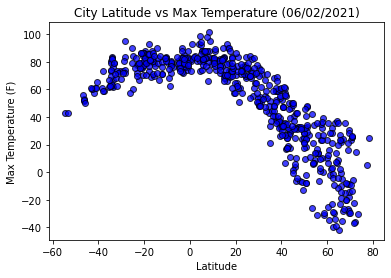

In [14]:
# Plot the data
plt.scatter(x_value, y_value, marker = 'o', facecolors = 'blue', edgecolors = 'black' , alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (06/02/2021)')
print("This plot shows the releationship between each city's latitude and its max temperature on a given date.")
plt.savefig('output/lat_vs_maxtemp.png')

## Latitude vs. Humidity Plot

In [15]:
# Set x and y values 
x_value = clean_city_data['Lat']
y_value = clean_city_data['Humidity']

This plot shows the releationship between each city's latitude and its max temperature on a given date.


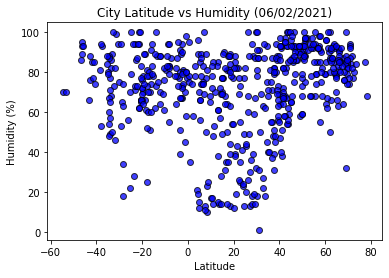

In [16]:
# Plot the data
plt.scatter(x_value, y_value, marker = 'o', facecolors = 'blue', edgecolors = 'black' , alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (06/02/2021)')
print("This plot shows the releationship between each city's latitude and its max temperature on a given date.")
plt.savefig('output/lat_vs_hum.png')

## Latitude vs. Cloudiness Plot

In [17]:
# Set x and y values 
x_value = clean_city_data['Lat']
y_value = clean_city_data['Cloudiness']

This plot shows the releationship between each city's latitude and its cloudiness on a given date.


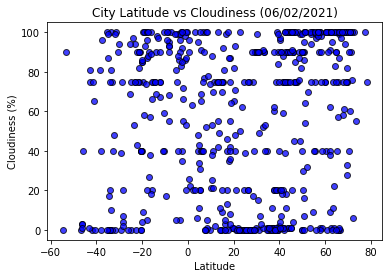

In [18]:
# Plot the data
plt.scatter(x_value, y_value, marker = 'o', facecolors = 'blue', edgecolors = 'black' , alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (06/02/2021)')
print("This plot shows the releationship between each city's latitude and its cloudiness on a given date.")
plt.savefig('output/lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

In [19]:
# Set x and y values 
x_value = clean_city_data['Lat']
y_value = clean_city_data['Wind Speed']

This plot shows the releationship between each city's latitude and its wind speed (mph) on a given date.


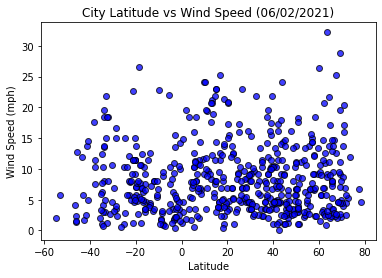

In [20]:
# Plot the data
plt.scatter(x_value, y_value, marker = 'o', facecolors = 'blue', edgecolors = 'black' , alpha = 0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (06/02/2021)')
print("This plot shows the releationship between each city's latitude and its wind speed (mph) on a given date.")
plt.savefig('output/lat_vs_windspeed.png')

## Linear Regression

In [21]:
# Make DataFrame for Northern Hemisphere
north_hem_df = clean_city_data.drop(clean_city_data[clean_city_data['Lat'] <= 0].index, inplace = False)

In [22]:
# Make DataFrame for Southern Hemisphere
south_hem_df = clean_city_data.drop(clean_city_data[clean_city_data['Lat'] >= 0].index, inplace = False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8818513476303393


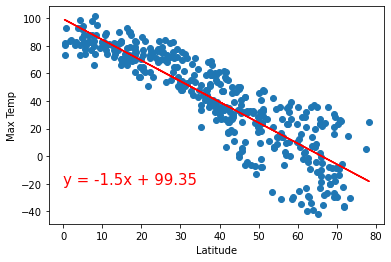

There is a strong negative relationship between each city's latitude and its maximum temperature in the Northern Hemisphere with an r-value of -0.88. The r-squared value is 0.78, which means that 78.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [23]:
# Plot linear regression
x_value = north_hem_df['Lat']
y_value = north_hem_df['Max temp'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a strong negative relationship between each city's latitude and its maximum temperature in the Northern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/nh_lat_vs_maxtemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6212628170647954


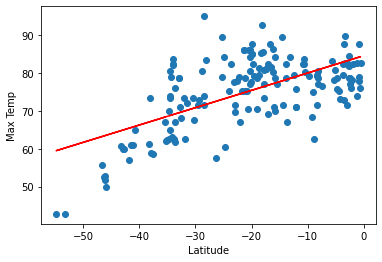

There is a moderate positive relationship between each city's latitude and its maximum temperature in the Southern Hemisphere with an r-value of 0.62. The r-squared value is 0.39, which means that 39.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [24]:
# Plot linear regression
x_value = south_hem_df['Lat']
y_value = south_hem_df['Max temp'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (-30,40), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a moderate positive relationship between each city's latitude and its maximum temperature in the Southern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/sh_lat_vs_maxtemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42931243932900665


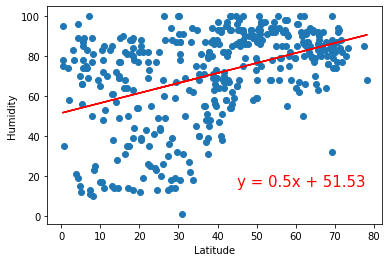

There is a weak positive relationship between each city's latitude and its humidity in the Northern Hemisphere with an r-value of 0.43. The r-squared value is 0.18, which means that 18.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [25]:
# Plot linear regression
x_value = north_hem_df['Lat']
y_value = north_hem_df['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (45,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a weak positive relationship between each city's latitude and its humidity in the Northern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/nh_lat_vs_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007041576406621378


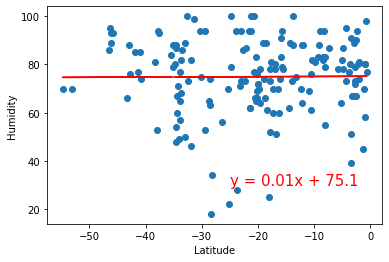

There is a weak positive to no relationship between each city's latitude and its humidity in the Southern Hemisphere with an r-value of 0.01. The r-squared value is 0.0, which means that 0.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [26]:
# Plot linear regression
x_value = south_hem_df['Lat']
y_value = south_hem_df['Humidity'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (-25,30), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a weak positive to no relationship between each city's latitude and its humidity in the Southern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/sh_lat_vs_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2895790155246337


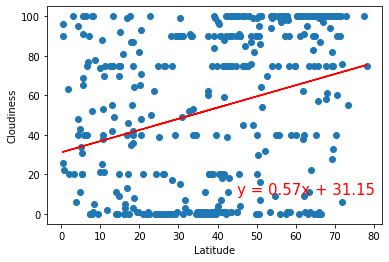

There is a weak positive relationship between each city's latitude and its cloudiness in the Northern Hemisphere with an r-value of 0.29. The r-squared value is 0.08, which means that 8.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [27]:
# Plot linear regression
x_value = north_hem_df['Lat']
y_value = north_hem_df['Cloudiness'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (45,10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a weak positive relationship between each city's latitude and its cloudiness in the Northern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/nh_lat_vs_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.42154522184701537


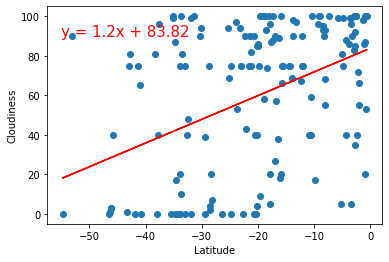

There is a weak positive relationship between each city's latitude and its cloudiness in the Southern Hemisphere with an r-value of 0.42. The r-squared value is 0.18, which means that 18.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [28]:
# Plot linear regression
x_value = south_hem_df['Lat']
y_value = south_hem_df['Cloudiness'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (-55,90), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is a weak positive relationship between each city's latitude and its cloudiness in the Southern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/sh_lat_vs_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07298546066916736


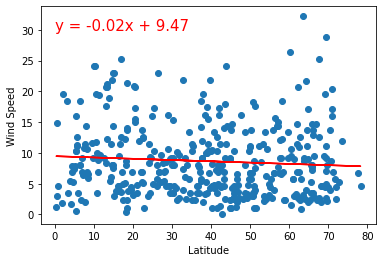

There is no relationship between each city's latitude and its wind speed in the Northern Hemisphere with an r-value of -0.07. The r-squared value is 0.01, which means that 1.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [29]:
# Plot linear regression
x_value = north_hem_df['Lat']
y_value = north_hem_df['Wind Speed'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (0,30), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is no relationship between each city's latitude and its wind speed in the Northern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/nh_lat_vs_winspeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11439489032796125


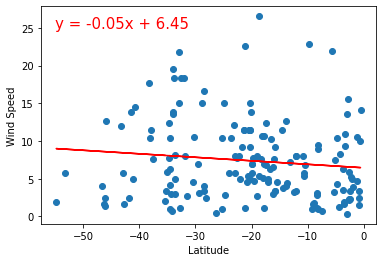

There is no relationship between each city's latitude and its wind speed in the Southern Hemisphere with an r-value of -0.11. The r-squared value is 0.01, which means that 1.0% of the data fit the regression model.  


<Figure size 432x288 with 0 Axes>

In [30]:
# Plot linear regression
x_value = south_hem_df['Lat']
y_value = south_hem_df['Wind Speed'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept 
line_eq = 'y = ' +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq, (-55,25), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue}')
plt.show()
print(f"There is no relationship between each city's latitude and its wind speed in the Southern Hemisphere with an r-value of {round(rvalue,2)}. The r-squared value is {round(rvalue**2,2)}, which means that {round(rvalue**2,2)*100}% of the data fit the regression model.  ")
plt.savefig('output/sh_lat_vs_windspeed.png')

In [31]:
# Export DataFrame to CSV 
clean_city_data.to_csv('output/clean_city_data.csv')